<h1 style='text-align:center'><b>INSTAGRAM LIKES PREDICTION</b></h1>

**IMPORT LIBRARIES**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**IMPORT DATASET**

In [61]:
df = pd.read_csv("D:\Downloads\instagram_reach.csv")

In [62]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


**To Check The Dimensions of Dataset**

In [63]:
df.shape

(100, 8)

In [64]:
df.to_csv("D:\instagram\data\inst.csv")

In [65]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [66]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [67]:
df.sample(5)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
36,9,21,bitpainting,"At 12 Noon EST today, BitPainting will be rele...",835,#blockchain #ethereum,2 hours,93
68,6,18,shine_my_idol,Life is all about the next step💎,371,#Entrepreneur#Business#Entrepreneurship#WontSt...,2 hours,19
82,9,17,illumensfragrance,simple elegance from @mumzynotjess featuring I...,845,#repost #interiors#white #elegant #simple #min...,2 hours,31
34,7,17,gsmusicgroupllc,gsmusicgroupllc#Repost @savageland32with @get_...,226,#youtube #applemusic #itunes#soundcloud #spinr...,2 hours,273
44,5,13,interwall,CEBIT 2018: Europas Business-Festival für Inno...,118,#cebit18 #cebit #hannover #cebit2018#ceyouinab...,2 hours,16


**CHECK INFO OF DATA**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


**There are Missing Values in Caption Columns**

In [69]:
df.isna().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

**Check Statistical Information of Dataset**

In [70]:
df.describe()

,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [71]:
df.describe(include='all')

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
count,100.000000,100.000000,100,94,100.00000,100,100,100.00000
unique,NaN,NaN,95,94,NaN,98,11,NaN
top,NaN,NaN,mikequindazzi,Who are #DataScientist and what do they do? >>...,NaN,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,NaN
freq,NaN,NaN,4,1,NaN,2,57,NaN
mean,8.940000,16.240000,NaN,NaN,961.96000,NaN,NaN,46.48000
std,6.639064,7.384286,NaN,NaN,1014.62567,NaN,NaN,55.08698
min,0.000000,1.000000,NaN,NaN,11.00000,NaN,NaN,8.00000
25%,4.000000,10.750000,NaN,NaN,252.75000,NaN,NaN,19.00000
50%,8.000000,16.500000,NaN,NaN,612.00000,NaN,NaN,29.00000
75%,12.250000,22.250000,NaN,NaN,1197.00000,NaN,NaN,46.00000


**DATA CLEANING**

**Remove Unneccessary Column From Datset**

In [72]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [73]:
df.drop(['Unnamed: 0', 'S.No'], inplace = True, axis = 1)

**To Check The Dimensions of Dataset**

In [74]:
df.shape

(100, 6)

**Dealing With Missing Values in Caption Column**

In [75]:
df = df.dropna()

In [76]:
df.shape

(94, 6)

**Change the Datatypes**

- Times since posted will be better if in type of int/float, so it will be changed.

In [77]:
Time_since_posted_in_hours = []

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

se = pd.Series(Time_since_posted_in_hours)
df['Times since posted (hours)'] = se.values
df['Times since posted (hours)'] = pd.to_numeric(df['Times since posted (hours)'])
df = df.drop('Time since posted', axis = 1)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   USERNAME                    94 non-null     object
 1   Caption                     94 non-null     object
 2   Followers                   94 non-null     int64 
 3   Hashtags                    94 non-null     object
 4   Likes                       94 non-null     int64 
 5   Times since posted (hours)  94 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 5.1+ KB


**Distribution of Followers Variable**

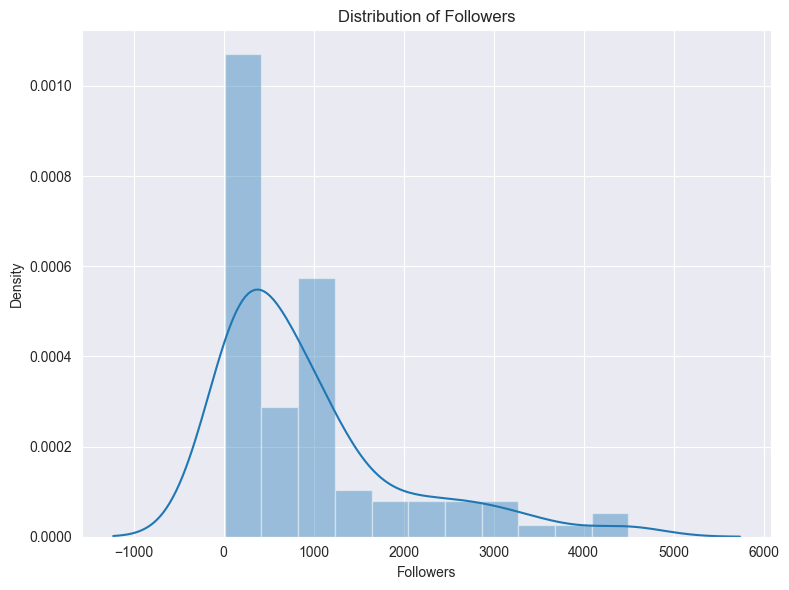

In [79]:
plt.figure(figsize=(8,6))
sns.distplot(df['Followers'])
plt.title('Distribution of Followers')
plt.tight_layout()
plt.show()

- The Followers Distribution in Right skewed.
- Most of the account has Followers in between 0-3000 or more. 

**Distribution of Time_since_in_hours Variables**

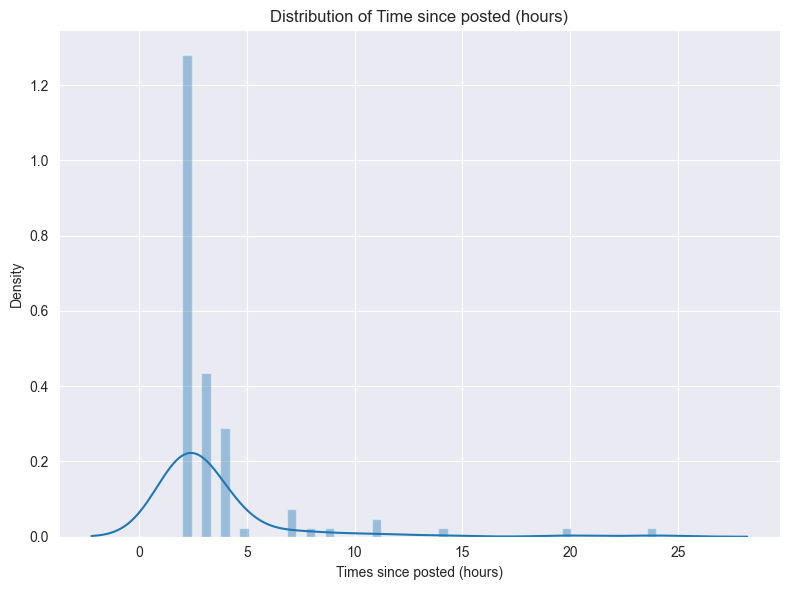

In [80]:
plt.figure(figsize=(8,6))
sns.distplot(df['Times since posted (hours)'])
plt.title('Distribution of Time since posted (hours)')
plt.tight_layout()
plt.show()

- The Distribution of Time_since_posted_hours is also Right Skewed.

**Caption Variables**

- In Analyzing this variable, I will use wordcloud to know which words are mostly used in Caption.

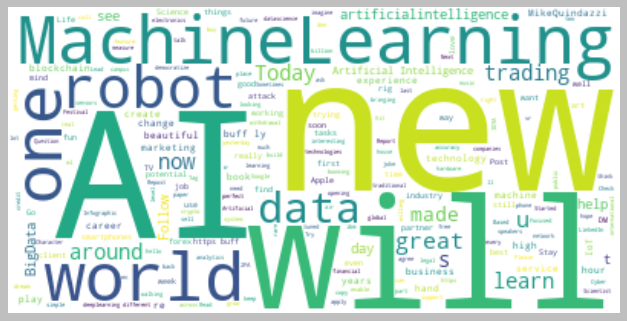

In [82]:
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color='white').generate(text)
plt.style.use('classic')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

- From wordclod above we know that words like 'AI', 'Will', 'new' are the top three words in Caption.

**Hashtags Variable**
- In Analyzing this variable, i will use wordcloud to know which words are mostly used in Hastags.

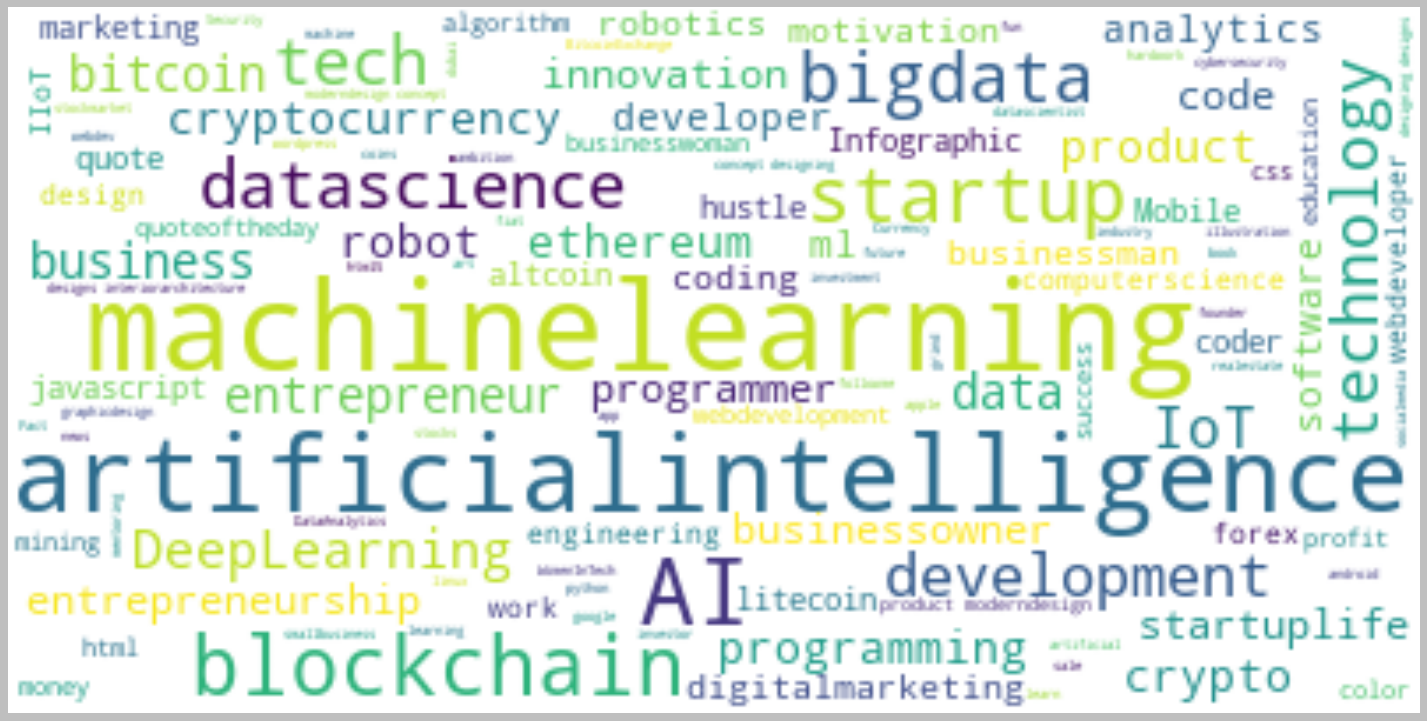

In [86]:
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color = 'white').generate(text)
plt.style.use('classic')
plt.figure(figsize=(18,26))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

- From wordcloud above we know that words like 'artificialintelligence', 'machinelearning', 'AI' are the top three words in Hashtags.

**Relationship Between Two Variables**

**Times since posted in hours & likes**

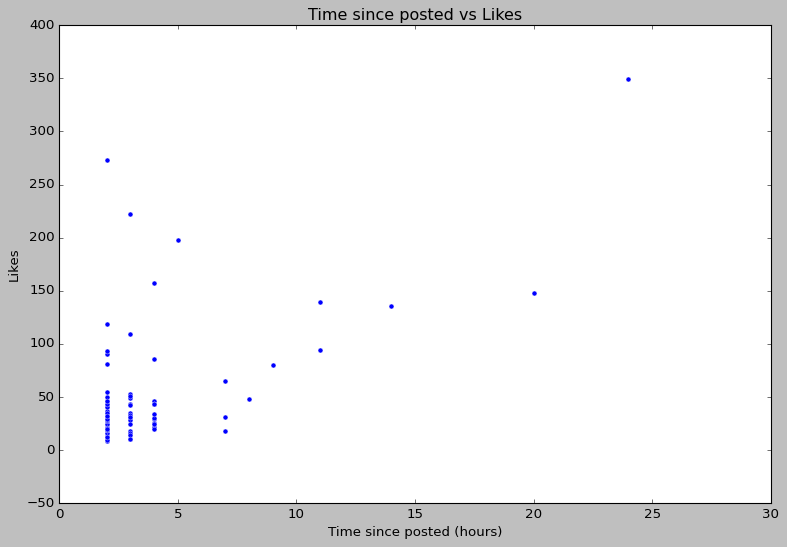

In [96]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Times since posted (hours)', y='Likes', data=df)
plt.title('Time since posted vs Likes')
plt.xlabel('Time since posted (hours)')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()

- There is linear relationship between times since posted and likes. 
- Some data shows no relationship between these two.

**Followers & Likes**

- I will use scatterplot to visualize the relationship between these variables.

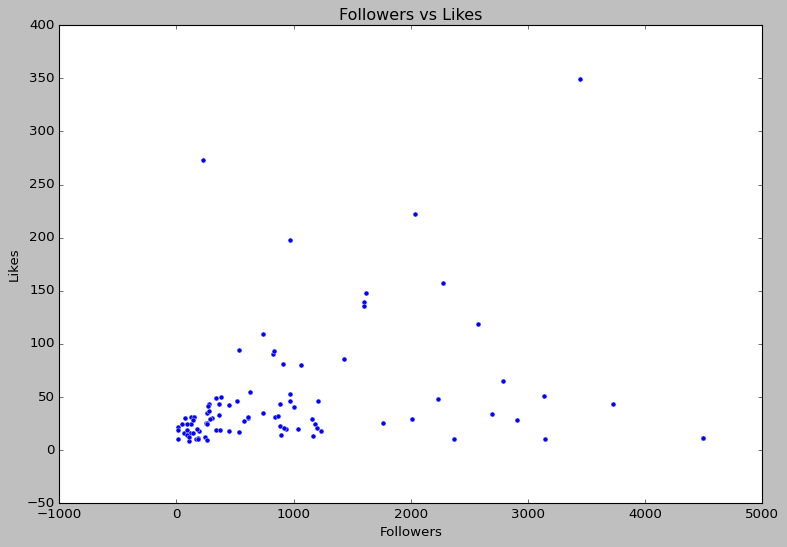

In [95]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Followers', y='Likes', data=df)
plt.title('Followers vs Likes')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()

**Heatmap**

In [97]:
num_cols = df.columns[df.dtypes != 'object']

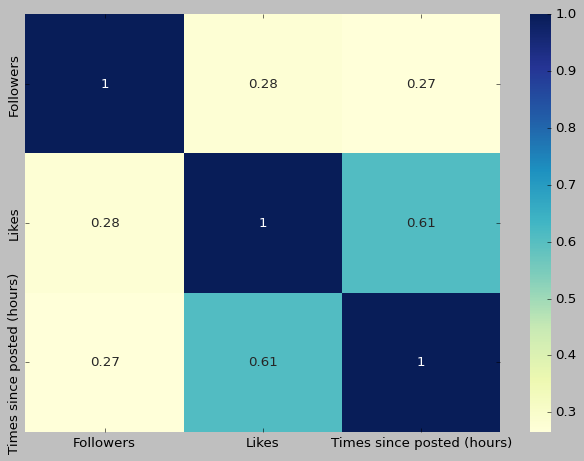

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap='YlGnBu', annot=True)
plt.tight_layout()
plt.show()

- There is strong correlation between Likes & Times since posted in hours.

**Modelling**

*Define X Variables & y Variable*

In [100]:
X = df[['Followers', 'Times since posted (hours)']]
y = df['Likes']

*Split the Data into Training & Testing Data*

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=24)

In [103]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 2), (19, 2), (75,), (19,))

In [104]:
lin_reg = LinearRegression()

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Fitting the Model**

In [107]:
lin_reg.fit(X_train, y_train)

LinearRegression()

*Prediction*

In [108]:
y_pred = lin_reg.predict(X_test)

In [117]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 1766.551020062238


In [118]:
print(f'Mean Absolute Error :{mean_absolute_error(y_test, y_pred)}')

Mean Absolute Error :25.89924317075146


In [119]:
lin_reg.predict([[1600, 11]])

array([120.93380976])